### This notebook includes fitting the pre-processed data from the Notebook01, applying DecisionTree model and discussing the performance.

In [1]:
# To Ignore warnings from scikit-learn
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

#### Loading the pre-processed data from the Notebook01.

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

### Fitting a Decision Tree Model

In [4]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
y_pred_decision = clf.predict(X_test)
y_pred_decision_proba = clf.predict_proba(X_test)[:, 1]
# Display the first few predictions
y_pred_decision[:10], y_pred_decision_proba[:10]

(array(['no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no'],
       dtype=object),
 array([0., 0., 1., 1., 0., 1., 1., 1., 0., 0.]))

### Measuring the performance of Decision-Tree model

In [6]:
# Accuracy
accuracy_decision = accuracy_score(y_test, y_pred_decision)
# Confusion Matrix
conf_matrix_decision = confusion_matrix(y_test, y_pred_decision)
# Classification Report
class_report_decision = classification_report(y_test, y_pred_decision)

print(f'Decision Tree Accuracy: {accuracy_decision}')
print(f'Decision Tree Confusion Matrix: \n{conf_matrix_decision}')
print(f'Decision Tree Classification Report: \n{class_report_decision}')

Decision Tree Accuracy: 0.942313669422515
Decision Tree Confusion Matrix: 
[[7486  529]
 [ 399 7673]]
Decision Tree Classification Report: 
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      8015
         yes       0.94      0.95      0.94      8072

    accuracy                           0.94     16087
   macro avg       0.94      0.94      0.94     16087
weighted avg       0.94      0.94      0.94     16087



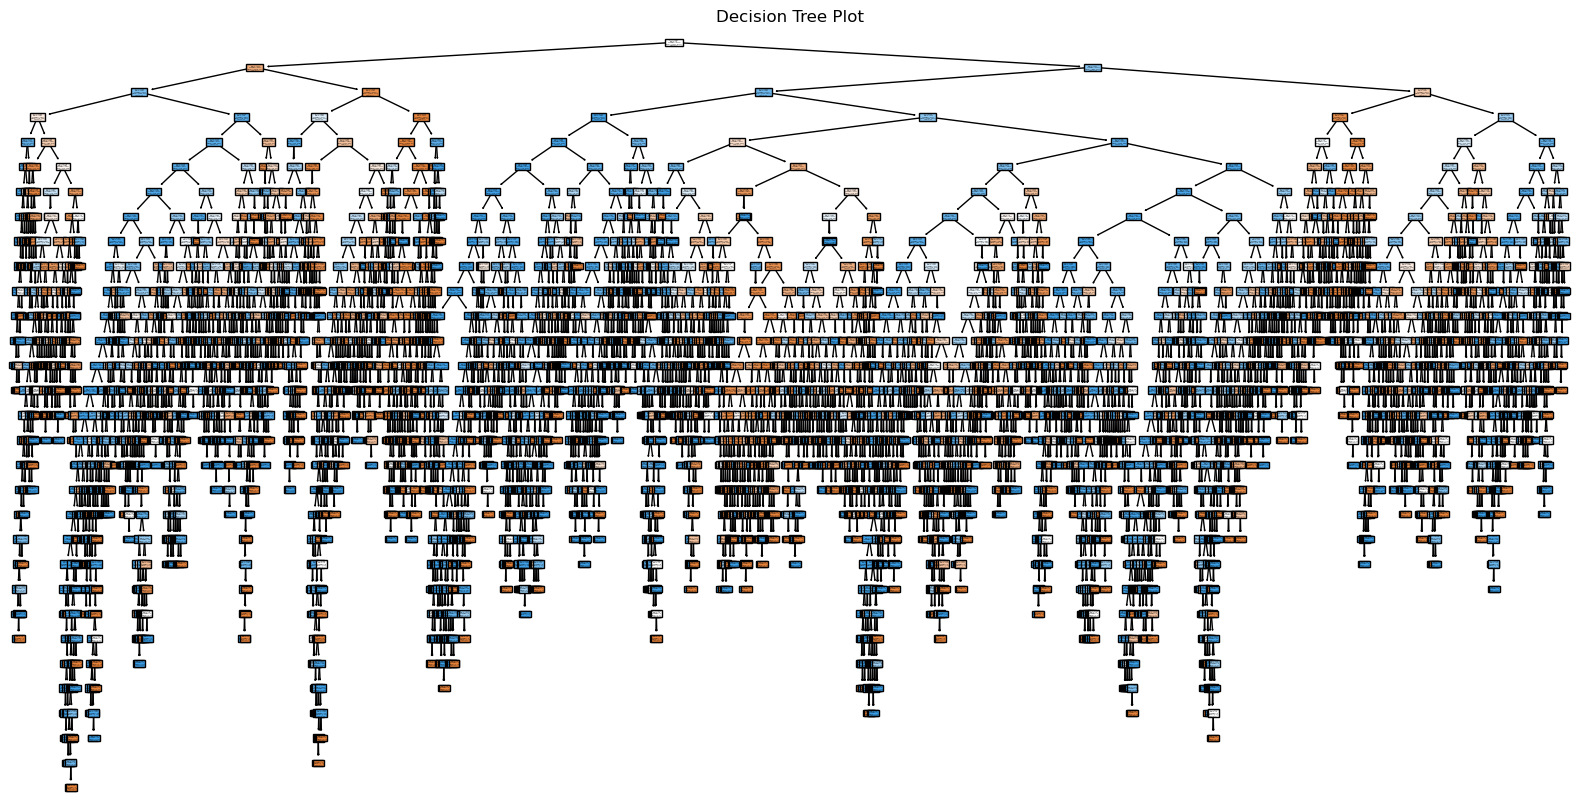

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['no', 'yes'])
plt.title("Decision Tree Plot")
plt.show()

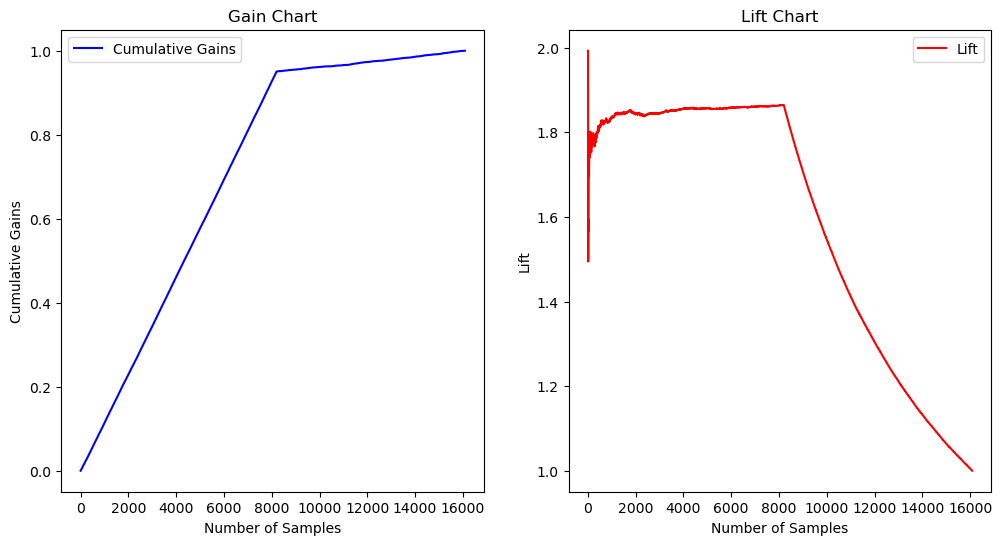

In [7]:
# Function to plot Lift and Gain Charts

import matplotlib.pyplot as plt

def plot_lift_gain_chart(y_true, y_pred_decision_proba):
    # Convert "yes" and "no" labels to binary labels (1 and 0)
    y_true_binary = y_true.replace({'yes': 1, 'no': 0}).values

    # Sort the probabilities and true labels in descending order
    sorted_indices = np.argsort(y_pred_decision_proba)[::-1]
    sorted_y_true = y_true_binary[sorted_indices]

    # Calculate the cumulative gains
    cum_gains = np.cumsum(sorted_y_true) / np.sum(sorted_y_true)

    # Calculate the lift values correctly
    baseline = np.linspace(0, 1, len(y_true))
    lift = cum_gains / baseline

    # Plot the Lift and Gain Charts
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cum_gains, label='Cumulative Gains', color='b')
    plt.xlabel('Number of Samples')
    plt.ylabel('Cumulative Gains')
    plt.title('Gain Chart')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(lift, label='Lift', color='r')
    plt.xlabel('Number of Samples')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.legend()
    plt.show()

# Plot the Lift and Gain Charts
plot_lift_gain_chart(y_test, y_pred_decision_proba)

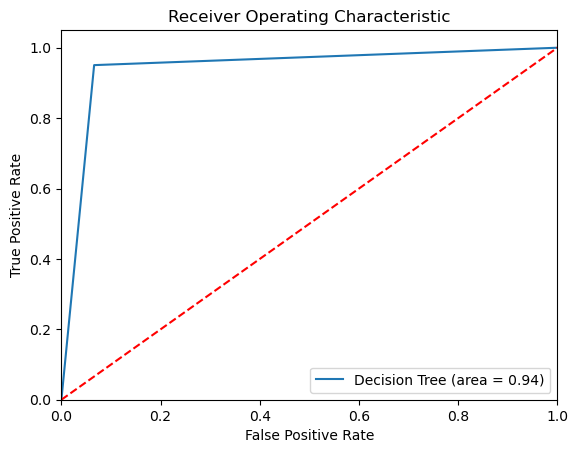

AUC Score:  0.9422843117494637


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert 'yes' and 'no' labels to binary labels (1 and 0)
y_test_binary = y_test.replace({'yes': 1, 'no': 0}).values

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_decision_proba)

# Now, you can plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score(y_test_binary, y_pred_decision_proba))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculating AUC
auc = roc_auc_score(y_test_binary, y_pred_decision_proba)
print("AUC Score: ", auc)

#### Applying Random Search for Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for Randomized Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Create the Randomized Search CV object
random_search = RandomizedSearchCV(
    dt_classifier, 
    param_distributions=param_grid, 
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',  # You can use different scoring metrics
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Show progress during the search
)

# Fit the Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f'Best Hyperparameters: {best_params}')
print(f'Best Model Accuracy: {accuracy_best}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 19, 'criterion': 'gini'}
Best Model Accuracy: 0.9426866413874557


#### Applying Grid Search for Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 20)),  # Include None for no maximum depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create the Grid Search CV object
grid_search = GridSearchCV(
    dt_classifier, 
    param_grid=param_grid,
    scoring='accuracy',  # You can use different scoring metrics
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Show progress during the search
)

# Fit the Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f'Best Hyperparameters: {best_params}')
print(f'Best Model Accuracy: {accuracy_best}')

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
Best Model Accuracy: 0.9454217691303537
